In [2]:
import pandas as pd
import numpy as np
credit = pd.read_csv("C:/Users/Administrator/Downloads/credit-default.csv") 

In [43]:
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


## Improving model performance
- Feature selection
    - correlation, Chi-square, ANOVA
- Feature extraction
    - Principal Component Analysis
- Feature engineering
    - Create new columns, transform numerical individual columns(log, sqrt, ......)
- Hyperparameter tuning
- .....

## Principal Component Analysis

In [44]:
ellipse = pd.read_csv('C:/Users/Administrator/Downloads/ellipse.csv')

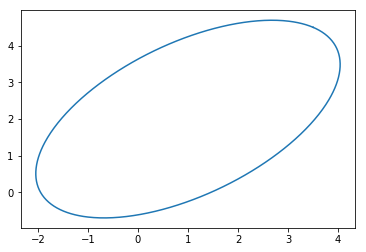

In [45]:
import matplotlib.pyplot as plt
plt.plot(ellipse['x'], ellipse['y'])

In [46]:
ellipse.corr()

,x,y
x,1.000000,0.552432
y,0.552432,1.000000


In [47]:
from numpy.linalg import eig
evalue, evector = eig(ellipse.corr())

In [48]:
evalue

array([1.552432, 0.447568])

In [49]:
evector

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [50]:
from sklearn.decomposition import PCA
pc_class = PCA()

pcs = pd.DataFrame(pc_class.fit_transform(ellipse), 
                  columns = ['PC1','PC2'])
pcs.head()

,PC1,PC2
0,-3.510896,-0.382795
1,-3.503481,-0.401419
2,-3.495715,-0.420003
3,-3.487598,-0.438545
4,-3.479133,-0.457043


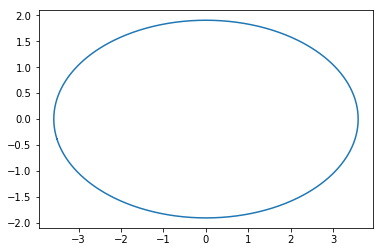

In [51]:
plt.plot(pcs['PC1'], pcs['PC2'])

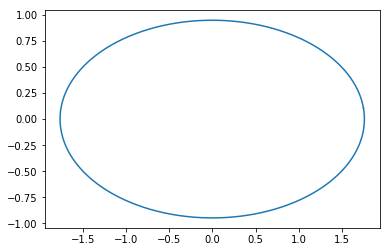

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ellipse_scaled = scaler.fit_transform(ellipse)

pcs = pd.DataFrame(np.dot(ellipse_scaled, evector), 
                  columns = ['PC1','PC2'])

plt.plot(pcs['PC1'],pcs['PC2'])

In [53]:
pcs_reduced = pcs
#pcs_reduced['PC2'] = 0
pcs_reduced.head()

,PC1,PC2
0,1.748056,0.106163
1,1.745987,0.115564
2,1.743744,0.124953
3,1.741326,0.134330
4,1.738733,0.143694


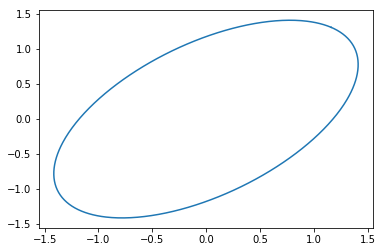

In [54]:
ellipse_rec = np.dot(pcs_reduced, np.matrix.transpose(evector)) # function for matrix multiplication
ellipse_rec = pd.DataFrame(ellipse_rec, columns = ellipse.columns)
plt.plot(ellipse_rec['x'],ellipse_rec['y'])

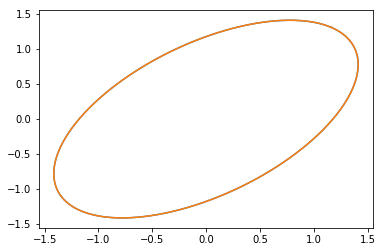

In [55]:
# Drawing PC1 in ellipse

df_ellipse_scaled = pd.DataFrame(ellipse_scaled, columns=['x','y'])
plt.plot(df_ellipse_scaled['x'],df_ellipse_scaled['y'])
plt.plot(ellipse_rec['x'],ellipse_rec['y'])


## Dimension Reduction

In [56]:
pcs_reduced.corr()

,PC1,PC2
PC1,1.000000e+00,5.648436e-17
PC2,5.648436e-17,1.000000e+00


In [57]:
df = pd.DataFrame(np.random.randint(1,10,100), columns = ['x'])
df['y'] = 0.2 * df['x'] + 10
noise = np.random.normal(5,5,100)

df['y2'] = 0.2 * df['x'] + 10 + noise
df['y3'] = 0.2 * np.square(df['x']) + 10
df['y4'] = 0.2 * np.sqrt(df['x']) + 10
df['y5'] = 0.2 * np.power(df['x'], 5)
df.corr()

,x,y,y2,y3,y4,y5
x,1.000000,1.000000,0.278607,0.974544,0.989285,0.846114
y,1.000000,1.000000,0.278607,0.974544,0.989285,0.846114
y2,0.278607,0.278607,1.000000,0.265005,0.279869,0.230490
y3,0.974544,0.974544,0.265005,1.000000,0.932392,0.937332
y4,0.989285,0.989285,0.279869,0.932392,1.000000,0.771750
y5,0.846114,0.846114,0.230490,0.937332,0.771750,1.000000


## PCA for ML
- using credit data

In [58]:
credit_dummies = pd.get_dummies(credit.drop('default', axis=1))
credit_dummies['default'] = credit['default']

from sklearn.model_selection import train_test_split

train, test = train_test_split(credit_dummies, test_size = 0.3, random_state=100)

In [59]:
train_x = train.drop('default', axis=1)
train_y = train['default']
test_x = test.drop('default', axis=1)
test_y = test['default']

In [60]:
from sklearn.ensemble import RandomForestClassifier
m1 = RandomForestClassifier(random_state=100)
m1.fit(train_x, train_y)
test_pred1 = m1.predict(test_x)

In [61]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(test_pred1, test_y))
print(classification_report(test_pred1, test_y))

0.76
             precision    recall  f1-score   support

          1       0.91      0.79      0.85       253
          2       0.35      0.60      0.44        47

avg / total       0.82      0.76      0.78       300



## Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
m2 = RandomForestClassifier(random_state=100)

pc_transformer = PCA()
scaler = StandardScaler()

scaler.fit(train_x)

train_x_scaled = scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)

pc_transformer.fit(train_x_scaled)
pcs_train = pc_transformer.transform(train_x_scaled)
pcs_test = pc_transformer.transform(test_x_scaled)

In [67]:
m2.fit(pcs_train, train_y)
test_pred2 = m2.predict(pcs_test)

print(accuracy_score(test_y, test_pred2))
print(classification_report(test_y, test_pred2))

0.74
             precision    recall  f1-score   support

          1       0.77      0.91      0.84       219
          2       0.54      0.27      0.36        81

avg / total       0.71      0.74      0.71       300



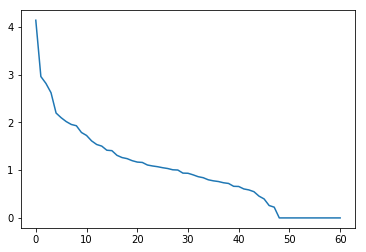

In [93]:
m3 = RandomForestClassifier(random_state=100)

cols = ['PC%d' % i for i in range(1,pcs_train.shape[1]+1)] # Here, % is for concatenation
# alternate method
# cols = ['PC' +  str(i) for i in range(1,pcs_train.shape[1]+1)]

df_pcs = pd.DataFrame(pcs_train)
df_pcs_train = pd.DataFrame(pcs_train, columns=cols)
df_pcs_test = pd.DataFrame(pcs_test, columns=cols)
df_pcs.var().plot.line()

In [70]:
'PC%d' %2

'PC2'

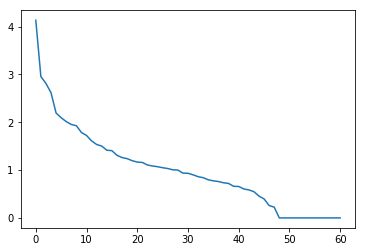

In [80]:
evalues, evectors = np.linalg.eig(pd.DataFrame(train_x_scaled).corr())
plt.plot(sorted(evalues)[::-1])

In [85]:
sum((np.cumsum(sorted(evalues/sum(evalues)*100)[::-1])) < 95)

41

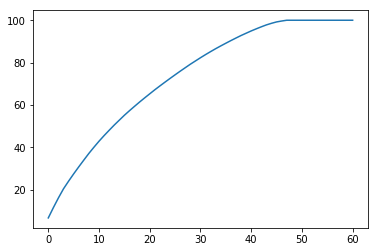

In [87]:
cum_vars = np.cumsum(sorted(evalues/ sum(evalues) *100)[::-1])
plt.plot(cum_vars)

In [95]:
m3 = RandomForestClassifier(random_state=100)
# selecting first 41 PCs
m3.fit(df_pcs_train.iloc[:,0:41], train_y)    # loc[] is for selecting rows only iloc is for both rows & cols
test_pred3 = m3.predict(df_pcs_test.iloc[:,0:41])
print(accuracy_score(test_y, test_pred3))
print(classification_report(test_y, test_pred3))

0.7233333333333334
             precision    recall  f1-score   support

          1       0.76      0.90      0.83       219
          2       0.48      0.25      0.33        81

avg / total       0.69      0.72      0.69       300



In [96]:
tr = pd.read_csv("C:/Users/Administrator/prediction.csv")

In [97]:
tr.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,2


In [1]:
import secrets 

In [ ]:
secrets.model_report1()